In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [5]:
ls data

signnames.csv  test.p  train.p


In [0]:
train = pd.read_pickle('data/train.p')

In [8]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [0]:
X_train, y_train = train['features'], train['labels']

In [10]:
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [11]:
X_train[0]

array([[[28, 25, 24],
        [27, 24, 23],
        [27, 24, 22],
        ...,
        [32, 28, 24],
        [31, 27, 25],
        [31, 27, 26]],

       [[29, 26, 25],
        [27, 25, 23],
        [27, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       [[28, 26, 26],
        [27, 25, 23],
        [26, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       ...,

       [[27, 24, 23],
        [28, 25, 24],
        [30, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [29, 25, 22]],

       [[28, 23, 23],
        [29, 24, 24],
        [31, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [28, 24, 21]],

       [[29, 23, 23],
        [30, 24, 24],
        [32, 24, 23],
        ...,
        [27, 24, 22],
        [27, 23, 21],
        [26, 22, 20]]], dtype=uint8)

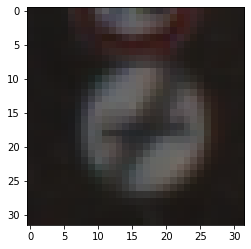

In [12]:
plt.imshow(X_train[0])

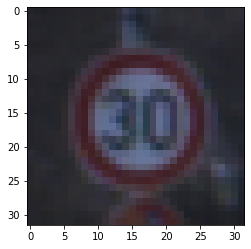

In [16]:
plt.imshow(X_train[4000])

In [0]:
signs = pd.read_csv('data/signnames.csv')

In [18]:
signs.head()

,a,b
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [19]:
signs.to_dict()

{'a': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42},
 'b': {0: 'Speed limit (20km/h)',
  1: 'Speed limit (30km/h)',
  2: 'Speed limit (50km/h)',
  3: 'Speed limit (60km/h)',
  4: 'Speed limit (70km/h)',
  5: 'Speed limit (80km/h)',
  6: 'End of speed limit (80km/h)',
  7: 'Speed limit (100km/h)',
  8: 'Speed limit (120km/h)',
  9: 'No passing',
  10: 'No passing for vehicles over 3.5 metric tons',
  11: 'Right-of-way at the next intersection',
  12: 'Priority road',
  13: 'Yield',
  14: 'Stop',
  15: 'No vehicles',
  16: 'Vehicles over 3.5 metric tons prohibited',
  17: 'No entry',
  18: 'General caution',
  19: 'Dangerous curve 

In [0]:
dict_signs = signs.to_dict()['b']

In [23]:
dict_signs[30]

'Beware of ice/snow'

In [24]:
# Ile jest znaków tego typu
X_train[y_train == 30].shape

(390, 32, 32, 3)

In [25]:
# Ile jest znaków każdego typu
for id_sign in dict_signs.keys():
    given_signs = X_train[y_train == id_sign]

    for i in range(9):
        plt.imshow(given_signs[i])
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [26]:
# Ile jest znaków każdego typu
for id_sign in dict_signs.keys():
    given_signs = X_train[y_train == id_sign]

    plt.figure(figsize=(15, 5))
    for i in range(9):
        plt.subplot('19{0}'.format(i+1))
        plt.imshow(given_signs[i])
        plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Liczba wystąpień poszczególnych znaków
cnt = Counter(y_train).most_common()

id_labels, cnt_labels = zip(*cnt)

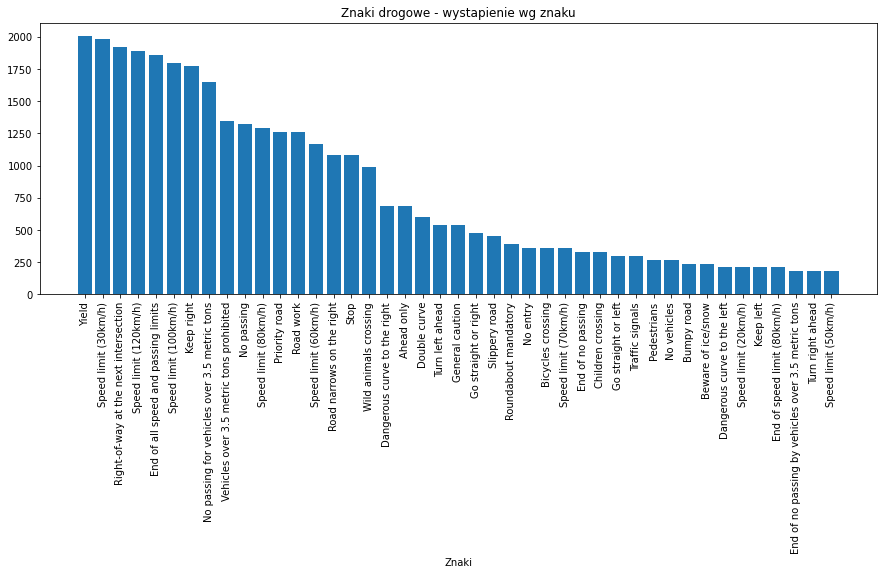

In [37]:
ids = range(len(id_labels))

plt.figure(figsize = (15, 5))
plt.bar(ids, cnt_labels)
plt.xlabel('Znaki')
labels = [dict_signs[id_labels[id_]] for id_ in id_labels]
plt.xticks(ids, labels, rotation = 'vertical')
plt.title('Znaki drogowe - wystapienie wg znaku')
plt.show()